<a href="https://colab.research.google.com/github/KondrashovIgor/Chip-firing-game-basic/blob/main/%D0%9F%D0%BE%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%BD%D1%8B%D0%B5%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B8%D0%91%D0%BE%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Тут константы: итерация 0(особая), входящий поток, значение черной дыры и забивочные переменные х,у для определения весов ребер. Тут граф строится
c = 0
w_In = 1500000
x = 0
y = 0
votes_Quote_Achieve_Iteration = 0

listOfEdges =[['s','Germany'], ['s','France'], ['Germany','MNE'],['France','MNE'], ['Spain','MNE'],['Greece','MNE'], ['MNE','q']]

#ParametersSheets are [Population 2022 (thousands), GDP at 2022 (thousands), medianNetSalary (eu/hour in prices of 2022), avgWageShift per 1k migrants,
#wage per capita(wage*Labour force/GDP), wageElasticity (dlog(|Shift|)/dlog(|LF|)),
#integrationCosts (thousands euro per migrant) (=1*(min wage 2023) OR (median wage in 2020(+avg.inflation rate by complex percent)) - (standard customer basket for 2 adults+1children*12months))]
verticesDict = {'s': [w_In, 0, 0, 0, 0, 0, 0],
                'Greece': [10858, 196690000, 8, -0.00155, 0.55,  -0.7434, 14.508],
                'MNE':[622, 4055000, 3.1, -0.00901, 0.6, -0.84174, 13.524],
                'Germany':[81198, 3383091000, 19.39, -0.00041, 0.66, -0.69366, 13.5],
                'France':[66458, 2439435000, 16.81, -0.00051, 0.527, -0.6092, 13.38],
                'Spain':[46426, 1199688000, 11.02, -0.00044, 0.565, -0.63569, 12.516],
                'q':[1000000, 0, 0, 0, 0, 0, 0]
}

dataProfitsAndLosses = {'Flow': [], 'TotalProfit': [], 'TotalLosses': [], 'Iter': [], 'Flowlosses': [] }
dataDistribution = {'Germany': [], 'France': [], 'MNE': [], 'Greece': [], 'Spain': []}


ProfitsVectorByAgents = 0
alpha = 0.37
crimeRatio = 0.01
remittancesRatio = 0.3
reproductionRatio = 0.1
inflationRatio = 0.05
socialEnthropyRatio = 0.33

value_list = []
ShrinkedList = []
InterQlist = []
voting_Vector=[]
all_Votes_Vector = []
countries_Vector=[]
total_Voting=[]
SolowModelProfitsVector = []
ProfitsVectorByAgents = []
OverallProfitsByIteration = []
list_for_K=[]
coalition=[]
players_coalition=[]
players_to_share=[]
coalition_profit=[]
profit_a = []
profits_M = []


#Тут мы строим репрезентацию графа по edge и смотрим нужные списки вершин, например списки соседей
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np
import pandas as pd

def ShrList (lst, n):
  ShrinkedList.clear()
  ShrinkedList.append(list(round(j, n) for j in lst))
  np.squeeze(ShrinkedList)
  return ShrinkedList

def flatten_list(nested_list):
  return [*nested_list[0]]

G = nx.Graph()

w_q = -1*w_In
def omegaCount(G, edgeNumber):
  omega = min(verticesDict.get(listOfEdges[edgeNumber][0])[0]*0.1, verticesDict.get(listOfEdges[edgeNumber][1])[0]*0.01)
  return omega

reframingList = [(listOfEdges[item][0], listOfEdges[item][1], omegaCount(G, item)) for item in range(len(listOfEdges))]
G.add_weighted_edges_from(reframingList)

  #elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
  #esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

  #pos = {'s': (2, -0.5), 'Germany': (0, -0.5), 'France': (1, 0.0), 'MNE': (0, 0.0), 'Greece': (-1, 0.0), 'Spain':(0, 0.5), 'q':(-1, -1)}

  #options = {
      #"font_size": 18,
      #"node_size": 6000,
      #"node_color": "white",
      #"edgecolors": "black",
      #"linewidths": 5,
      #"width": 10,
  #}
  #plt.figure(figsize =(16,16))
  #nx.draw_networkx(G, pos, **options)

In [ ]:
dataPaL10mln = {'Iteration': [], 'TotalProfit': [], 'TotalLosses': [], 'PureProfit': [], 'Germany': [], 'France': [], 'MNE': [], 'Greece': [], 'Spain': []}

In [ ]:
def FullCFModel(w_In, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio):
  w_q = -1*w_In
  def omegaCount(G, edgeNumber):
    omega = min(verticesDict.get(listOfEdges[edgeNumber][0])[0]*0.1, verticesDict.get(listOfEdges[edgeNumber][1])[0]*0.01)
    return omega

  reframingList = [(listOfEdges[item][0], listOfEdges[item][1], omegaCount(G, item)) for item in range(len(listOfEdges))]
  G.add_weighted_edges_from(reframingList)

  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

  pos = {'s': (1, -0.5), 'Germany': (0, -0.5), 'France': (1, 0.0), 'MNE': (0, 0.0), 'Greece': (-1, 0.0), 'Spain':(0, 0.5), 'q':(-1, -0.5)}

  options = {
      "font_size": 18,
      "node_size": 6000,
      "node_color": "white",
      "edgecolors": "black",
      "linewidths": 5,
      "width": 10,
  }
  plt.figure(figsize =(16,16))
  nx.draw_networkx(G, pos, **options)

  def omega1(x, y, c, G):
    if G.has_edge(x, y):
      if x == 's':
        omega = w_In/G.degree['s']
      elif y == 's':
        omega = 0
      else:
        omega = G.get_edge_data(x,y)['weight']
    else:
      omega = 0
    return omega

  value_list = []
  value_list.clear()

  def w(x):
    if x == 's':
      w = w_In
    elif x == 'q':
      w = w_q
    else:
      w = 0
    return w

  for i in range(len(list(G.nodes))):
    value_list.append(w(list(G.nodes)[i]))

  #Определяем сумму файринга для каждой вершины
  def total_To_Fire(i, G):
    currentVal = 0
    new_value = 0
    for j in list(G.neighbors(i)):
      currentVal = omega1(i, j, c, G)
      new_value += currentVal
    return new_value

  #Делаем список сумм файринга
  firing_list = []
  for i in list(G.nodes):
    firing_list.append(total_To_Fire(i,G))

  #лист-связка ценность вершины - сумма файринга
  fired_firing_list = [(i,j) for i,j in zip(value_list,firing_list)]
  #связка вершина - текущая ценность - сумма файринга
  vertices_fired_firing_list = [(i,j,k) for i,j,k in zip(G.nodes, value_list,firing_list)]
  S_fired_firing_list = sorted(vertices_fired_firing_list, key = lambda x: x[1], reverse = True)

  for k in range(len(fired_firing_list)):
    print(vertices_fired_firing_list[k])

  def vertex_To_Be_Fired(G, vertices_fired_firing_list):
    FFL = vertices_fired_firing_list
    FL = [item for item in FFL if item[1] >= item[2]]
    SFL = sorted(FL, key = lambda x: x[1], reverse = True)
    value_To_Fire = SFL[0][1]
    vertex_To_Fire = SFL[0][0]
    FL.clear()
    return value_To_Fire, vertex_To_Fire

  vertex_To_Be_Fired(G, vertices_fired_firing_list)
  value_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[0]
  vertex_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[1]

  #Убеждаемся, что за итерация игры. После первой итерации игра к с==0 вернуться не должна.
  def check_iter(vertex_To_Fire):
    if vertex_To_Fire == 's':
      c = 0
    else:
      c = 1
    return c

  #c = check_iter(vertex_To_Fire)

  #Выводим сумму, сколько будем вычитать из ценности vertex_To_Fire
  def summ_To_Fire(vertex_To_Fire, G):
    c = check_iter(vertex_To_Fire)
    new_value = 0
    for i in list(G.neighbors(vertex_To_Fire)):
      currentVal = omega1(vertex_To_Fire, i, c, G)
      new_value += currentVal
    return new_value
  #Вычитаем сумму ребер между vertex_To_Fire и ее соседями, задаем, что новая ценность вершины под индексом vertex_To_Fire равна разности ее ценности до fire и весов ребер
  def fired_vertex(vertex_To_Fire, value_To_Fire, G):
    a = value_To_Fire - summ_To_Fire(vertex_To_Fire, G)
    return a

  #Тут добавляем каждому соседу vertex_To_Fire ценность, равную весу ребра между ней и vertex_To_Fire
  def add(vertex_To_Fire, value_list, G):
    c = check_iter(vertex_To_Fire)
    for i in list(G.neighbors(vertex_To_Fire)):
        b = value_list[list(G.nodes).index(i)] + omega1(vertex_To_Fire, i,c, G)
        value_list[list(G.nodes).index(i)] = b
    return value_list

  def matrix(j, value_list):
    profits_Matrix=value_list[j]
    return profits_Matrix

  def adoptionC(i):
    adoptionCostRatio = (1+(1*reproductionRatio)**1)/(math.log(verticesDict.get(list(G.nodes)[i])[0]+0.0001, 2))
    return adoptionCostRatio

  def InterQ (i):
    adoptCost = adoptionC(i)
    if list(G.nodes)[i] == 's':
      intraCountryQ = 0
    elif list(G.nodes)[i] == 'q':
      intraCountryQ = 0
    else:
      intraCountryQ = (((value_list[i]/verticesDict.get(list(G.nodes)[i])[0]-socialEnthropyRatio)*0.00001*verticesDict.get(list(G.nodes)[i])[1])**2)+20000+np.e**(2+(0.003*verticesDict.get(list(G.nodes)[i])[0])*(value_list[i]/verticesDict.get(list(G.nodes)[i])[0]))*verticesDict.get(list(G.nodes)[i])[6]*1000*value_list[i]*crimeRatio + value_list[i]*0.6*(np.sqrt((verticesDict.get(list(G.nodes)[i])[2]-value_list[i]*verticesDict.get(list(G.nodes)[i])[3])**2))*1800*remittancesRatio + verticesDict.get(list(G.nodes)[i])[6]*1000*value_list[i]
    return intraCountryQ

  def chip_firing_game(value_list, firing_list, G):
    fired_firing_list = [(i,j) for i,j in zip(value_list,firing_list)]
    vertices_fired_firing_list = [(i,j,k) for i,j,k in zip(G.nodes, value_list,firing_list)]
    cont_Criterion = [item for item in fired_firing_list if item[0]>=item[1]]
    if len(cont_Criterion) >= 1:
      value_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[0]
      index_To_Fire = value_list.index(value_To_Fire)
      vertex_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[1]

      value_list[index_To_Fire] = fired_vertex(vertex_To_Fire, value_To_Fire, G)
      value_list = add(vertex_To_Fire, value_list, G)
      return value_list, ''
    else:
      return value_list, 'Game over with'

  for i in range (1000000):
    print(ShrList(value_list,2))
    profit_a.append([value_list[j] for j in range(len(value_list))])
    InterQlist.append([InterQ(j) for j in range(len(value_list))])
    value_list, msg = chip_firing_game(value_list, firing_list, G)
    print(msg)
    if msg == 'Game over with':
      EndingIter = i
      print(f'{msg}:{ShrList(value_list, 2)} at the iteration {i}')
      break

  def interQByIteration(i):
    if i <= len(InterQlist):
      iterVectorQ = InterQlist[i]
      return iterVectorQ
    else:
      msg = 'No such iteration'
      return msg

  profits_M = np.transpose(profit_a)

  profits_M

  countries_Vector = list(G.nodes)

  for i in range(len(countries_Vector)):
    if countries_Vector[i] != 's':
      if countries_Vector[i] != 'q':
        list_for_K.append(i)
      else:
        continue
    else:
      continue

  def interQByAgent(j):
    if j <= len(InterQlist[0]):
      agentVectorQ = np.transpose(InterQlist)
      agentVectorQPart = agentVectorQ[j]
      return agentVectorQPart
    else:
      msg = 'No such agent'
      return msg

  def profitFunction(profits_M, i):
    SolowModelProfitsVector.clear()
    for j in range(len(profits_M[i])):
      SolowModelProfitsVector.append(-0.5*verticesDict.get(list(G.nodes)[i])[4]*verticesDict.get(list(G.nodes)[i])[5]*((profits_M[i][j]/verticesDict.get(list(G.nodes)[i])[0])**2)*verticesDict.get(list(G.nodes)[i])[1]*1000)
    return SolowModelProfitsVector

  ProfitsVectorByAgents = []
  for i in list_for_K:
    ProfitsVectorByAgents.append([profitFunction(profits_M, i)[j] for j in range(len(profits_M[0]))])

  OverallProfitsByIteration = []
  for j in range(len(ProfitsVectorByAgents[0])):
    OverallProfitsByIteration.append(sum([ProfitsVectorByAgents[i][j] for i in range(len(ProfitsVectorByAgents))]))

  def votes(profits_M, k):
    a = interQByAgent(k)
    voting_Vector.clear()
    for i in range(len(profits_M[k])):
      if i<len(profit_a)-1:
        if profitFunction(profits_M, k)[i]-a[i]>=max((profitFunction(profits_M, k)[i+1:len(profits_M[k])])-a[i]):
          voting_Vector.append(1)
        else:
          voting_Vector.append(0)
      else:
        break
    return voting_Vector

  all_Votes_Vector.clear()
  for k in list_for_K:
    all_Votes_Vector.append(list(votes(profits_M, k)))

  votes_by_Iteration = np.transpose(all_Votes_Vector)
  votes_Quote_Achieve_Iteration = 0

  for i in range(len(votes_by_Iteration)):
    if sum(votes_by_Iteration[i]) < 0.75*len(votes_by_Iteration[i]):
      continue
    else:
      coalition.extend(votes_by_Iteration[i])
      votes_Quote_Achieve_Iteration = i
      print(f'voting structure is:{coalition} within iteration {i}')
      break

  if votes_Quote_Achieve_Iteration == 0:
    votes_Quote_Achieve_Iteration = EndingIter
  else:
    votes_Quote_Achieve_Iteration = votes_Quote_Achieve_Iteration

  for i in range(len(coalition)):
    if coalition[i] == 1:
      players_coalition.append(list_for_K[i])
    else:
      continue

  players_to_share.extend(list(G.nodes)[i] for i in players_coalition)
  coalition_profit.extend(profitFunction(profits_M, list(G.nodes).index(i))[votes_Quote_Achieve_Iteration]-interQByAgent(list(G.nodes).index(i))[votes_Quote_Achieve_Iteration] for i in players_to_share)
  print(f'coalition is:{players_to_share} with profits:{ShrList(coalition_profit,2)} with total profit of:{round(sum(coalition_profit), 2)}')
  print(f'Total profit of agents is: {round(OverallProfitsByIteration[votes_Quote_Achieve_Iteration],2)}')
  print(round(profits_M[-1][0] - profits_M[-1][votes_Quote_Achieve_Iteration],2))
  print(round(sum(InterQlist[votes_Quote_Achieve_Iteration],2)))
  print(ShrList(InterQlist[votes_Quote_Achieve_Iteration],2))

  return votes_Quote_Achieve_Iteration, profits_M, OverallProfitsByIteration[votes_Quote_Achieve_Iteration], players_to_share, coalition_profit,ProfitsVectorByAgents,OverallProfitsByIteration, profits_M[-1][0] - profits_M[-1][votes_Quote_Achieve_Iteration], InterQlist[votes_Quote_Achieve_Iteration]

('s', 10000, 10000.0)
('Germany', 0, 6.22)
('France', 0, 6.22)
('MNE', 0, 87.08)
('Spain', 0, 6.22)
('Greece', 0, 6.22)
('q', -10000, 62.2)
[[10000, 0, 0, 0, 0, 0, -10000]]

[[0.0, 5000.0, 5000.0, 0, 0, 0, -10000]]

[[0.0, 4993.78, 5000.0, 6.22, 0, 0, -10000]]

[[0.0, 4993.78, 4993.78, 12.44, 0, 0, -10000]]

[[0.0, 4987.56, 4993.78, 18.66, 0, 0, -10000]]

[[0.0, 4987.56, 4987.56, 24.88, 0, 0, -10000]]

[[0.0, 4981.34, 4987.56, 31.1, 0, 0, -10000]]

[[0.0, 4981.34, 4981.34, 37.32, 0, 0, -10000]]

[[0.0, 4975.12, 4981.34, 43.54, 0, 0, -10000]]

[[0.0, 4975.12, 4975.12, 49.76, 0, 0, -10000]]

[[0.0, 4968.9, 4975.12, 55.98, 0, 0, -10000]]

[[0.0, 4968.9, 4968.9, 62.2, 0, 0, -10000]]

[[0.0, 4962.68, 4968.9, 68.42, 0, 0, -10000]]

[[0.0, 4962.68, 4962.68, 74.64, 0, 0, -10000]]

[[0.0, 4956.46, 4962.68, 80.86, 0, 0, -10000]]

[[0.0, 4956.46, 4956.46, 87.08, 0, 0, -10000]]

[[0.0, 4950.24, 4956.46, 93.3, 0, 0, -10000]]

[[0.0, 4950.24, 4950.24, 99.52, 0, 0, -10000]]

[[0.0, 4944.02, 4950.24, 

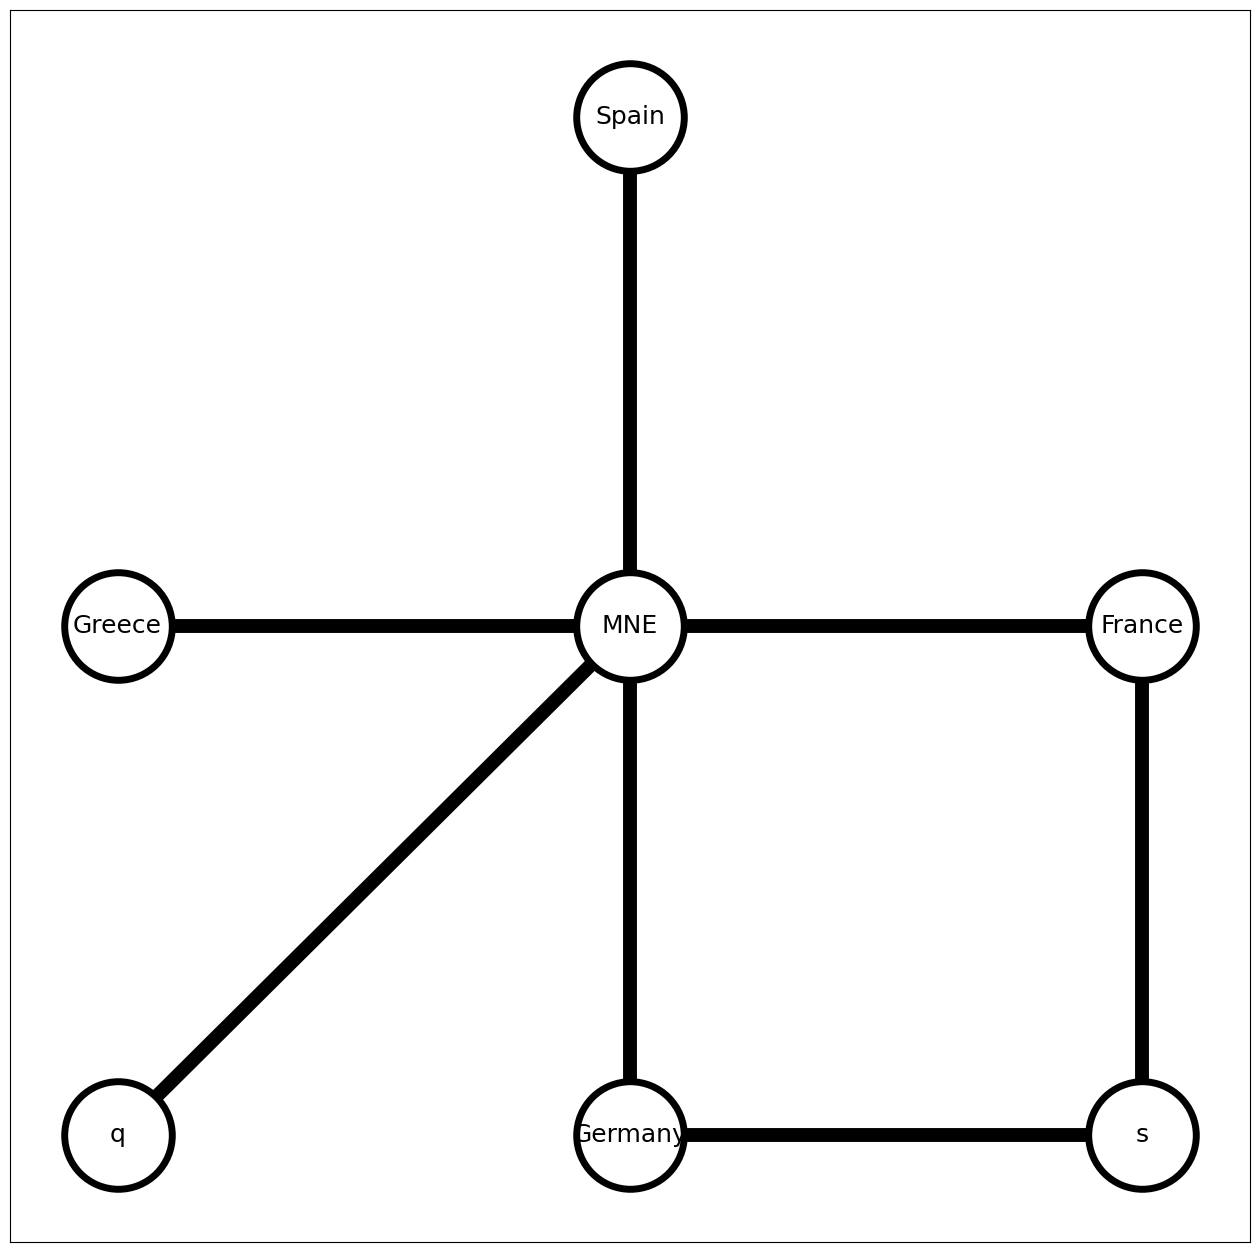

In [ ]:
#OneValue game

value_list.clear()
coalition.clear()
profit_a.clear()
ProfitsVectorByAgents.clear()
OverallProfitsByIteration.clear()
players_to_share.clear()
coalition_profit.clear()
players_coalition.clear()
list_for_K.clear()
InterQlist.clear()
voting_Vector.clear()
all_Votes_Vector.clear()
SolowModelProfitsVector.clear()

iterations, MigrantsFlowByPlayer, TP, CoalitionOfAgreement, CoalitionOfAgreementProfit, ProfitsOfAllAgents, OverallProfitForIterationList, MQ, TQ = FullCFModel(10000, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio)

In [ ]:
#def flatten_list(nested_list):
#    return [*nested_list[0]]

# Пример использования
#nested_list = ShrList([TP, sum(TQ), iterations, MQ], 2)
#flattened_list = flatten_list(nested_list)
#print(flattened_list)  # Вывод: [np.float64(3714886.73), np.float64(210255518.86), 166, np.float64(-684.2)]

[np.float64(3714886.73), np.float64(210255518.86), 166, np.float64(-684.2)]


In [ ]:
#MultiInput series of games

MFList = np.linspace(1000, 10000, 19)
ProfitMFList = []
LossMFList= []
IterMFList = []
MQsMFList = []
FlowbyLastIterList = []

for unit in MFList:
  value_list.clear()
  coalition.clear()
  profit_a.clear()
  ProfitsVectorByAgents.clear()
  OverallProfitsByIteration.clear()
  players_to_share.clear()
  coalition_profit.clear()
  players_coalition.clear()
  list_for_K.clear()
  InterQlist.clear()
  voting_Vector.clear()
  all_Votes_Vector.clear()
  SolowModelProfitsVector.clear()
  FlowbyLastIterList.clear()
  iterations, MigrantsFlowByPlayer, TP, CoalitionOfAgreement, CoalitionOfAgreementProfit, ProfitsOfAllAgents, OverallProfitForIterationList, MQ, TQ = FullCFModel(unit, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio)
  FlowbyIter = np.transpose(MigrantsFlowByPlayer)
  FlowbyLastIter = FlowbyIter[iterations]
  FlowbyLastIterList.append([FlowbyLastIter[item] for item in range(len(FlowbyLastIter))])
  flattenFLIL = flatten_list(FlowbyLastIterList)
  ShrflattenFLIL = flatten_list(ShrList(flattenFLIL, 2))
  ShrflattenFLIL.pop(0)
  ShrflattenFLIL.pop(-1)
  dfPL.loc[len(dfPL)] = [unit, round(TP, 2), round(sum(TQ), 2), iterations, round(MQ, 2)]
  dfFD.loc[len(dfFD)] = ShrflattenFLIL
  #ProfitMFList.append(round(TP, 2))
  #LossMFList.append(round(sum(InterQlist[-1]),2))
  #IterMFList.append(iterations)
  #MQsMFList.append(round(MQ,2))

Выходные данные были обрезаны до нескольких последних строк (5000).

[[np.float64(0.0), np.float64(85.0), np.float64(91.22), 6.22, 87.08, 87.08, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(85.0), np.float64(85.0), 12.44, 87.08, 87.08, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(85.0), np.float64(85.0), 18.66, 80.86, 87.08, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(85.0), np.float64(85.0), 24.88, 80.86, 80.86, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(78.78), np.float64(85.0), 31.1, 80.86, 80.86, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(78.78), np.float64(78.78), 37.32, 80.86, 80.86, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(78.78), np.float64(78.78), 43.54, 74.64, 80.86, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(78.78), np.float64(78.78), 49.76, 74.64, 74.64, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(72.56), np.float64(78.78), 55.98, 74.64, 74.64, np.float64(-356.6)]]

[[np.float64(0.0), np.float64(72.56), np.

In [ ]:
InterQlistTotal=[]
InterQlistTotal.clear()

InterQlistTotal.append([sum(InterQlist[item]) for item in range(len(InterQlist))])

FlattenedInterQlistTotal = flatten_list(InterQlistTotal)

In [ ]:
MFbyIter = []
MFbyIter.clear()

MFbyIter = np.array(MigrantsFlowByPlayer).tolist()
MFbyIter.pop(0)
MFbyIter.pop(-1)

MFbyIterReal = MFbyIter

In [ ]:
dfPL10mln = pd.DataFrame(dataPaL10mln)

In [ ]:
for i in range(len(OverallProfitForIterationList)):
  dfPL10mln.loc[len(dfPL10mln)] = [i, OverallProfitForIterationList[i], FlattenedInterQlistTotal[i], OverallProfitForIterationList[i]-FlattenedInterQlistTotal[i], MFbyIterReal[0][i], MFbyIterReal[1][i], MFbyIterReal[2][i], MFbyIterReal[3][i], MFbyIterReal[4][i]]

In [ ]:
dfPL10mln

,Iteration,TotalProfit,TotalLosses,PureProfit,Germany,France,MNE,Greece,Spain
0,0.0,0.000000e+00,2.056390e+08,-2.056390e+08,0.00,0.00,0.00,0.000000e+00,0.000000e+00
1,1.0,3.220622e+08,3.413994e+08,-1.933724e+07,1250.00,1250.00,0.00,0.000000e+00,0.000000e+00
2,2.0,3.203427e+08,3.401872e+08,-1.984452e+07,1243.78,1250.00,6.22,0.000000e+00,0.000000e+00
3,3.0,3.192746e+08,3.389713e+08,-1.969675e+07,1243.78,1243.78,12.44,0.000000e+00,0.000000e+00
4,4.0,3.179737e+08,3.377877e+08,-1.981400e+07,1237.56,1243.78,18.66,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
592,592.0,3.734158e+06,2.067430e+08,-2.030088e+08,12.22,12.22,37.32,6.220000e+00,6.220000e+00
593,593.0,5.052016e+06,2.067709e+08,-2.017189e+08,6.00,12.22,43.54,6.220000e+00,6.220000e+00
594,594.0,6.577934e+06,2.067842e+08,-2.002063e+08,6.00,6.00,49.76,6.220000e+00,6.220000e+00
595,595.0,8.314827e+06,2.067918e+08,-1.984769e+08,6.00,6.00,55.98,2.664535e-14,6.220000e+00


In [ ]:
G.nodes

NodeView(('s', 'Germany', 'France', 'MNE', 'Spain', 'Greece', 'q'))

In [ ]:
# Функция для обновления графа на каждом кадре
def update(i):
    plt.cla()
    pos = nx.spring_layout(G)  # Позиции узлов
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
    for edge in G.edges():
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=2, alpha=0.5)
    for node in G.nodes:
        plt.annotate(f"{node}: {df[node][i]}", xy=pos[node], xytext=(pos[node][0], pos[node][1] + 0.1), fontsize=10)
    plt.title(f"Динамика популяции стран, год {i+1}")

# Анимация
ani = FuncAnimation(plt.gcf(), update, frames=len(df), interval=500, repeat=False)

# Сохранение анимации в GIF
ani.save('population_dynamics.gif', writer='pillow')

# Отображение GIF
Image('population_dynamics.gif')

In [ ]:
dfPL10mln.to_excel('PL10mlnWIthDistr.xlsx')

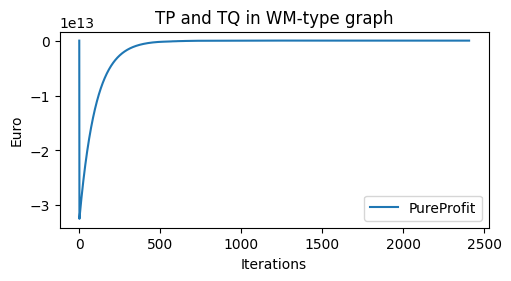

In [ ]:
x = np.linspace(0,2407,2408)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL10mln['PureProfit'], label='PureProfit')  # Plot more data on the Axes...
ax.set_xlabel('Iterations')  # Add an x-label to the Axes.
ax.set_ylabel('Euro')  # Add a y-label to the Axes.
ax.set_title("TP and TQ in WM-type graph")  # Add a title to the Axes.
ax.legend()  # Add a legend.

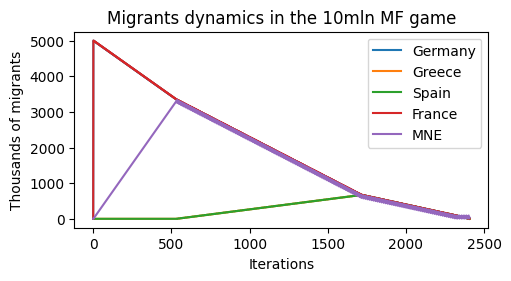

In [ ]:
x = np.linspace(0,2407,2408)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL10mln['Germany'], label='Germany')  # Plot more data on the Axes...
ax.plot(x, dfPL10mln['Greece'], label='Greece')  # Plot more data on the Axes...
ax.plot(x, dfPL10mln['Spain'], label='Spain')  # Plot more data on the Axes...
ax.plot(x, dfPL10mln['France'], label='France')  # Plot more data on the Axes...
ax.plot(x, dfPL10mln['MNE'], label='MNE')  # Plot more data on the Axes...
ax.set_xlabel('Iterations')  # Add an x-label to the Axes.
ax.set_ylabel('Thousands of migrants')  # Add a y-label to the Axes.
ax.set_title("Migrants dynamics in the 10mln MF game")  # Add a title to the Axes.
ax.legend()  # Add a legend.

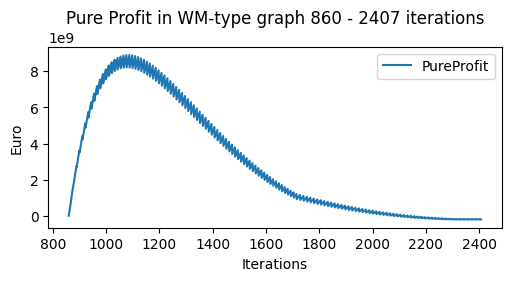

In [ ]:
x = np.linspace(860,2407,1547)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL10mln['PureProfit'].iloc[range(860,2407,1)], label='PureProfit')  # Plot more data on the Axes...
ax.set_xlabel('Iterations')  # Add an x-label to the Axes.
ax.set_ylabel('Euro')  # Add a y-label to the Axes.
ax.set_title(f"Pure Profit in WM-type graph {860} - {2407} iterations")  # Add a title to the Axes.
ax.legend()  # Add a legend.

In [ ]:
zero_line = []
zero_line.clear()
for i in range(len(MFList)):
  zero_line.append(0)

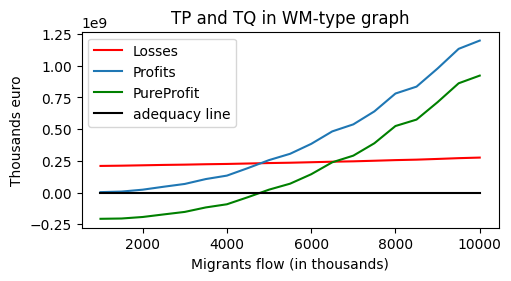

In [ ]:
x = MFList  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL['TotalLosses'], label='Losses', color='red')  # Plot some data on the Axes.
ax.plot(x, dfPL['TotalProfit'], label='Profits')  # Plot more data on the Axes...
ax.plot(x, dfPL['TotalProfit'] - dfPL['TotalLosses'], label='PureProfit', color = 'g')
ax.plot(x, zero_line, label='adequacy line', color = 'black')
ax.set_xlabel('Migrants flow (in thousands)')  # Add an x-label to the Axes.
ax.set_ylabel('Thousands euro')  # Add a y-label to the Axes.
ax.set_title("TP and TQ in WM-type graph")  # Add a title to the Axes.
ax.legend()  # Add a legend.

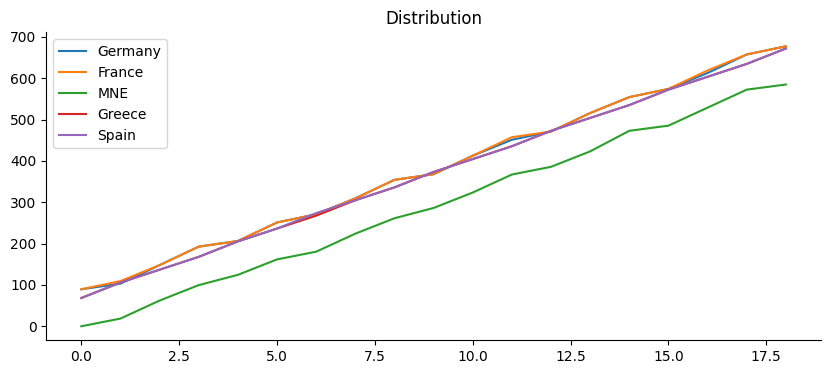

In [ ]:
dfFD.plot(kind='line', figsize=(10, 4), title='MF Distribution at the stopping iteration')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
dfFD.to_excel('Distribution.xlsx')

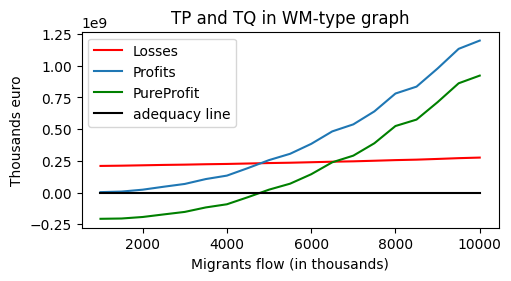

In [ ]:
x = MFList  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL['TotalLosses'], label='Losses', color='red')  # Plot some data on the Axes.
ax.plot(x, dfPL['TotalProfit'], label='Profits')  # Plot more data on the Axes...
ax.plot(x, dfPL['TotalProfit'] - dfPL['TotalLosses'], label='PureProfit', color = 'g')
ax.plot(x, zero_line, label='adequacy line', color = 'black')
ax.set_xlabel('Migrants flow (in thousands)')  # Add an x-label to the Axes.
ax.set_ylabel('Thousands euro')  # Add a y-label to the Axes.
ax.set_title("TP and TQ in WM-type graph")  # Add a title to the Axes.
ax.legend()  # Add a legend.

In [ ]:
x = np.linspace(1, iterations, iterations)

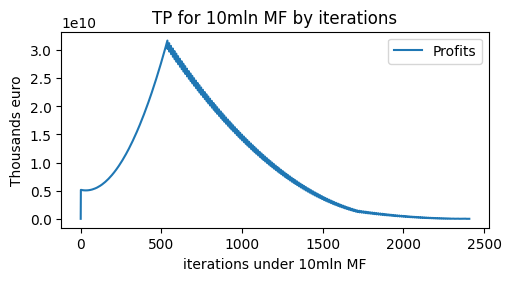

In [ ]:
x = np.linspace(1, len(OverallProfitForIterationList), len(OverallProfitForIterationList))  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL10mln['TotalProfit'], label='Profits')  # Plot more data on the Axes...
ax.set_xlabel('iterations under 10mln MF')  # Add an x-label to the Axes.
ax.set_ylabel('Thousands euro')  # Add a y-label to the Axes.
ax.set_title("TP for 10mln MF by iterations")  # Add a title to the Axes.
ax.legend()  # Add a legend.

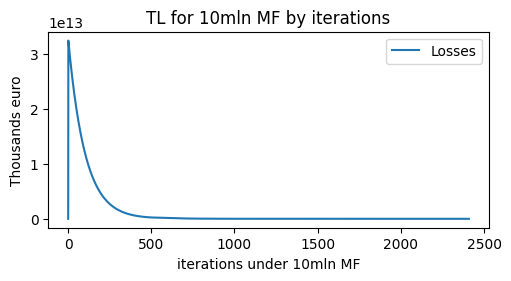

In [ ]:
x = np.linspace(1, len(OverallProfitForIterationList), len(OverallProfitForIterationList))  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL10mln['TotalLosses'], label='Losses')  # Plot more data on the Axes...
ax.set_xlabel('iterations under 10mln MF')  # Add an x-label to the Axes.
ax.set_ylabel('Thousands euro')  # Add a y-label to the Axes.
ax.set_title("TL for 10mln MF by iterations")  # Add a title to the Axes.
ax.legend()  # Add a legend.

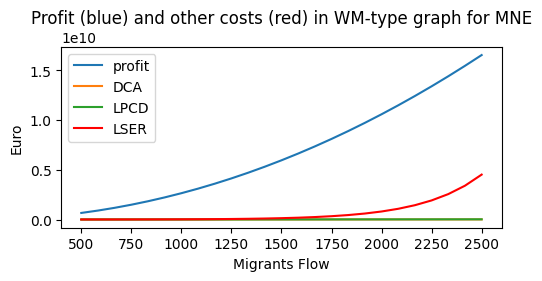

In [ ]:
import numpy as np
country = 'MNE'

item = np.linspace(500, 2500, 25)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(item, -0.5*verticesDict.get(country)[4]*verticesDict.get(country)[5]*((item/verticesDict.get(country)[0])**2)*verticesDict.get(country)[1]*1000, label='profit')  # Plot some data on the Axes.
ax.plot(item, verticesDict.get(country)[6]*1000*item/3, label='DCA')  # Plot more data on the Axes...
ax.plot(item, item*0.6*(np.sqrt((verticesDict.get(country)[2]-item*verticesDict.get(country)[3]))**2)*1800*remittancesRatio, label='LPCD')  # ... and some more.
ax.plot(item, (((item/verticesDict.get(country)[0]-socialEnthropyRatio)*0.00001*verticesDict.get(country)[1])**2)+20000+np.e**(2+(0.003*verticesDict.get(country)[0])*(item/verticesDict.get(country)[0]))*verticesDict.get(country)[6]*1000*item*crimeRatio, label='LSER', color = 'red')
ax.set_xlabel('Migrants Flow')  # Add an x-label to the Axes.
ax.set_ylabel('Euro')  # Add a y-label to the Axes.
ax.set_title(f"Profit (blue) and other costs (red) in WM-type graph for {country}")  # Add a title to the Axes.
ax.legend()  # Add a legend.